In [1]:
# import the libraries
import numpy as np
import pandas as pd# import the dataset
df = pd.read_csv('heart_new.csv')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_getdummy=pd.get_dummies(data=df,columns=['sex'])
# seperate X and y variables
X = df_getdummy.drop('target',axis=1)
y = df_getdummy['target'] 

In [27]:
#importing standardscaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()

#standardizing the data apart from the class column
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

#data_scaled = pd.DataFrame(sst.fit_transform(df.drop('Outbreak',axis=1)))
#Adding the class column back to the DataFram
data_scaled.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
#data_scaled.head()

In [28]:
data_scaled['class']=df.target
#data_scaled

In [29]:
data_scaled = data_scaled[data_scaled['class'].notna()]
#loading the data
x = data_scaled.iloc[:,0:13]
y = data_scaled.iloc[:,13:14]

#splitting the dataset
#splitting the dataset into Train and Test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

#X_train

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#fit logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

#predict the test set results
y_pred=classifier.predict(X_test)

C:\Users\skant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [37]:
#generate confusion matrix for evaluation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 6,  2],
       [ 0, 16]], dtype=int64)

The accuracy of the logistic regression is: 93.05555555555556%.


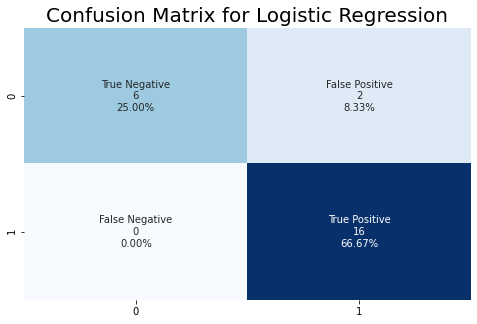

In [38]:
#find accuracy score(accuracy=number of times you're right/number of predictions)
from sklearn.metrics import accuracy_score
paccur=accuracy_score(y_true=y_train,y_pred=classifier.predict(X_train))
print('The accuracy of the logistic regression is: ' +str(paccur*100)+'%.')
import numpy as np

# Generate Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
 cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
 cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues', cbar = False)
plt.gcf().set_size_inches(8,5)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 20)
plt.show()

In [39]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y, 
random_state = 101, test_size=0.20)
y_train.value_counts(normalize=True)

class
1        0.736842
0        0.263158
dtype: float64

In [40]:

#distribution in validation set
y_valid.value_counts(normalize=True)
#shape of training set
X_train.shape, y_train.shape
((242, 13), (242, 1))
#shape of validation set
X_valid.shape, y_valid.shape
((61, 13), (61, 1))
#importimg decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#importimg decision tree regressor
from sklearn.tree import DecisionTreeRegressor
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)
#fitting the model
dt_model.fit(X_train , y_train)
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [41]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.65

In [42]:
#predictions on validation set
dt_model.predict(X_valid)

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [43]:
a=dt_model.predict([[1,2,3,4,5,6,7,8,9,10,11,12,13]])
y_pred = dt_model.predict_proba(X_valid) [:,1]
print(a)

[1]


In [44]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i] < 0.4:
         new_y.append(0)
    else:
         new_y.append(1)
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, new_y)

0.65

In [45]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.855263,0.80
1,2,0.894737,0.70
2,3,0.960526,0.70
3,4,0.973684,0.65
4,5,0.986842,0.65


No handles with labels found to put in legend.


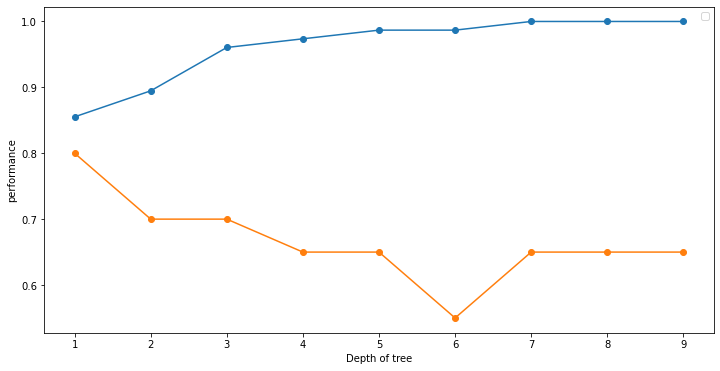

In [46]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend( )

In [18]:
#validation score
dt_model.score(X_valid, y_valid)

0.65

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_log=lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred_log)
print('Confusion Matrix:\n',cm)
#checking accuracy
from sklearn.metrics import accuracy_score
lra=accuracy_score(y_test,y_pred_log)
print('accuracy score=',lra)

Confusion Matrix:
 [[ 8  0]
 [ 0 16]]
accuracy score= 1.0


C:\Users\skant\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


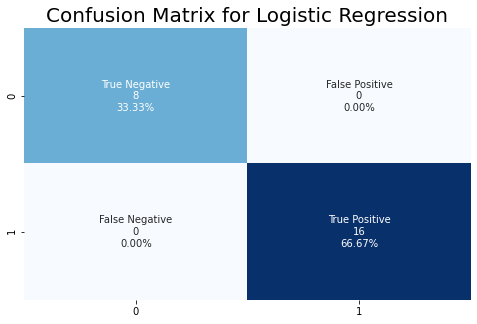

In [21]:
# Generate Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_log)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
 cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
 cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues', cbar = False)
plt.gcf().set_size_inches(8,5)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 20)
plt.show()

In [22]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_dec=dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred_dec)
print('Confusion Matrix:\n',cm)
#checking accuracy
from sklearn.metrics import accuracy_score
dta=accuracy_score(y_test,y_pred_dec)
print('accuracy score=',dta)

Confusion Matrix:
 [[ 8  0]
 [ 1 15]]
accuracy score= 0.9583333333333334


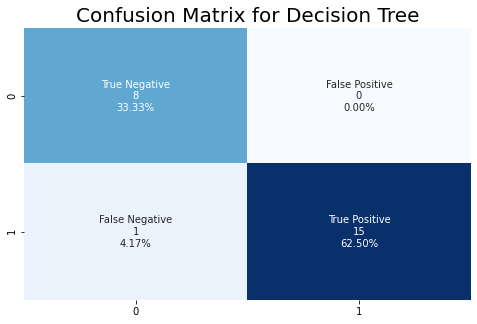

In [23]:
# Generate Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_dec)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
 cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
 cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues', cbar = False)
plt.gcf().set_size_inches(8,5)
plt.title('Confusion Matrix for Decision Tree', fontsize = 20)
plt.show()

In [24]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10, criterion='entropy')
rf.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_RF=rf.predict(X_test)
cm=confusion_matrix(y_test,y_pred_RF)
print('Confusion Matrix:\n',cm)
#checking accuracy
from sklearn.metrics import accuracy_score
rfa=accuracy_score(y_test,y_pred_RF)
print('accuracy score=',rfa)

Confusion Matrix:
 [[ 8  0]
 [ 0 16]]
accuracy score= 1.0


<ipython-input-24-b504f9463836>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [25]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)
#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_KNN=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred_KNN)
print('Confusion Matrix:\n',cm)
#checking accuracy
from sklearn.metrics import accuracy_score
knna=accuracy_score(y_test,y_pred_KNN)
print('accuracy score=',knna)

Confusion Matrix:
 [[ 8  0]
 [ 0 16]]
accuracy score= 1.0


<ipython-input-25-26cf36f550b9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


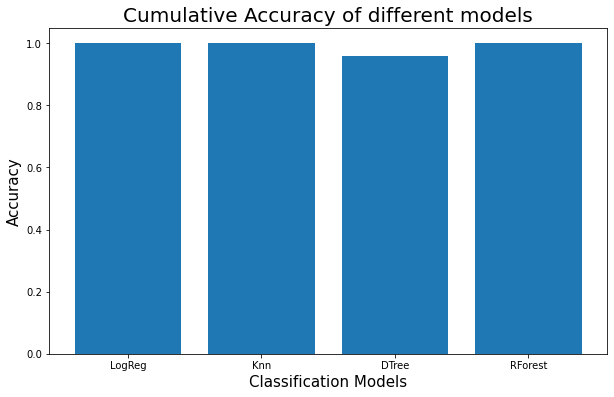

In [26]:
plt.figure(figsize=(10,6))
ac=[lra,knna,dta,rfa]
name=['LogReg','Knn','DTree','RForest']
plt.title('Cumulative Accuracy of different models',fontsize=20)
plt.xlabel('Classification Models',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.bar(name,ac)
plt.show()